In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Data Pre-Processing

In [4]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [5]:
dataset.drop_duplicates(inplace=True)

In [6]:
# Remove Invalid data
zero_not_accepted = ['Glucose',	'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',	'DiabetesPedigreeFunction', 'Age']
for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0, np.nan)
    mean = int(dataset[column].mean(skipna=True))  # skipna=True means that missing values (like NaN or None) ignored when performing calculations
    dataset[column] = dataset[column].replace(np.nan, mean)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [7]:
x = dataset.iloc[:, :-1].values      # Features
y = dataset.iloc[:, -1]       # Target

print(x)
#print(x.head())
y.head()

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [8]:
# Formula for Min-Max Normalization:
# For each feature x in your dataset, Min-Max scaling is performed using the following formula:
#
# x_scaled = (x - min(x)) / (max(x) - min(x))
#
# Where:
# x         : The original value
# min(x)    : The minimum value of the feature
# max(x)    : The maximum value of the feature
# x_scaled  : The normalized value

In [9]:
mms = MinMaxScaler()     # [0-1]
X = mms.fit_transform(x)
X

array([[0.35294118, 0.67096774, 0.48979592, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.05882353, 0.26451613, 0.42857143, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.47058824, 0.89677419, 0.40816327, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.49677419, 0.48979592, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.05882353, 0.52903226, 0.36734694, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.05882353, 0.31612903, 0.46938776, ..., 0.24948875, 0.10119556,
        0.03333333]], shape=(768, 8))

In [10]:
# Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [11]:
num_features = 8
learning_rate = 0.001
epoch = 1000
threshold = 0.5
w = np.zeros(num_features, np.float32)

In [12]:
for i in range(epoch):
    y1 = np.dot(X_train, w)
    
    y1[y1 >= threshold] = 1
    y1[y1 < threshold] = 0

    error = y_train - y1
    w += learning_rate * np.dot(np.transpose(X_train), error)
    # print(f'Epoch : {i} Error : {error} Weight : {w}')
print(f'Epoch : {i} Error : {error} Weight : {w}')
    

Epoch : 999 Error : 60     0.0
618    0.0
346    0.0
294    0.0
231    0.0
      ... 
71     0.0
106    0.0
270    0.0
435    0.0
102    0.0
Name: Outcome, Length: 614, dtype: float64 Weight : [ 0.06364727  0.32283938  0.2448063   0.31834722 -0.0086142   0.17099534
  0.1128162   0.04129982]


In [13]:
cm = confusion_matrix(y_train, y1)
print(cm)
print(accuracy_score(y_train,y1))

[[320  81]
 [ 75 138]]
0.745928338762215


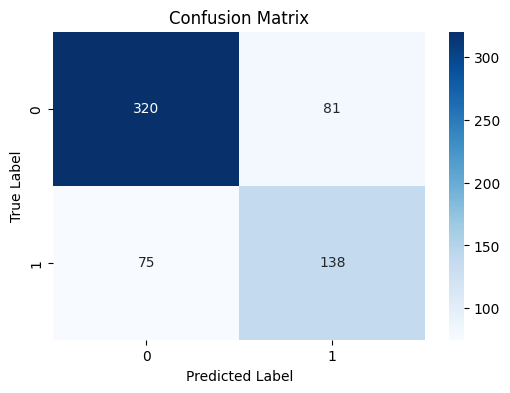

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [15]:
for i in range(len(X_test)):
    y2 = np.dot(X_test, w)
    y2[y2 >= threshold] = 1
    y2[y2 < threshold] = 0

In [16]:
# Confusion Matrix for Test Data
cm = confusion_matrix(y_test, y2)
print(cm)

# Accuracy Score for Test Data
accuracy = accuracy_score(y_test, y2)
print(accuracy)

[[78 21]
 [20 35]]
0.7337662337662337


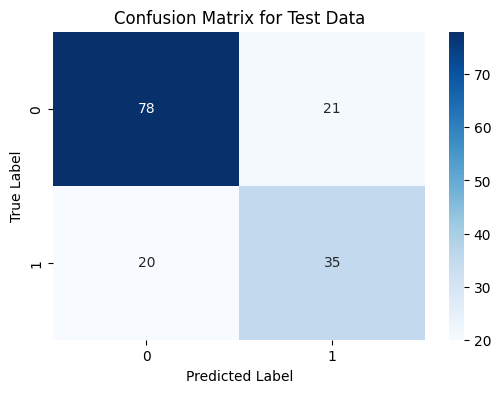

In [17]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()